# Impact of Voice-Activated Artificial Intelligence Devices

### This portion of the project will collect data and analyze 2 questions

* What shares do different smart speakers own in the market?
* What do consumers buy using voice activated AI devices?

In [19]:
%matplotlib notebook

In [20]:
# Import dependencies
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import pandas as pd
import numpy as np

In [21]:
# Import data into Pandas from CSV

# Import Smart Speakers Consumer Report from March 2019
smart_file = "Resources/smart_speaker_consumer_adoption_report_2019.csv"

# Import Voice Shopping Consumer Report from June 2018
shop_file = "Resources/voice-shopping-consumer-adoption-report-june-2018.csv"

# Set CSV files into Dataframes
smart_df = pd.read_csv(smart_file)
shop_df = pd.read_csv(shop_file)

### What shares do different smart speakers own in the market?

In [22]:
# Display Smart Speakers Consumer Report Dataframe
smart_df.head()

,brand_2019,device,smart_display_2018,usage_2019,usage_2018,number_devices_2019,number_devices_2018,living_room,bedroom,kitchen,...,health_and_wellness,none_of_the_above,celebrities,politics,local_business,travel,other,professional_work_related,finance_banking_investing,fashion
0,Amazon,Amazon Echo Dot,Amazon Alexa,Daily,Daily,1,1,no,no,yes,...,no,no,no,no,yes,no,no,no,no,no
1,Google,Google Home Mini,None,Monthly,Monthly,1,1,no,yes,no,...,no,yes,no,no,no,no,no,no,yes,no
2,Amazon,Amazon Echo Dot,None,Monthly,Daily,3,4,yes,no,yes,...,yes,no,no,no,no,no,no,yes,no,no
3,Other,Other,None,Daily,Daily,5-10,10+,yes,yes,no,...,no,no,no,no,no,no,no,yes,no,no
4,Amazon,Amazon Echo or Plus,None,Never/Rarely,Monthly,2,2,yes,yes,no,...,no,no,no,no,no,no,no,no,no,no


In [23]:
# Create a dataframe with only the relevant columns from the dataset that surveyed smart speakers device models
device_df = pd.DataFrame({"Brand": smart_df["brand_2019"],
              "Device": smart_df["device"]})

# Display new dataframe
device_df.head()

,Brand,Device
0,Amazon,Amazon Echo Dot
1,Google,Google Home Mini
2,Amazon,Amazon Echo Dot
3,Other,Other
4,Amazon,Amazon Echo or Plus


In [24]:
# Get total number of surveyed
smart_surveyed_total = len(device_df["Device"])


print(f"There are a total of {smart_surveyed_total} smart device owners surveyed.")

There are a total of 1038 smart device owners surveyed.


In [25]:
# Group by Devices
device_group = device_df.groupby("Device")

# Device name list
device_name = device_group["Device"].unique().str[0]

# Count list
device_count = device_group["Device"].count()

# Display devices and counts
device_count

Device
Amazon Echo Dot        326
Amazon Echo Show        31
Amazon Echo Spot        36
Amazon Echo or Plus    241
Apple HomePad           28
Google Home            117
Google Home Hub         12
Google Home Max          2
Google Home Mini       117
Other                  105
Sonos One               23
Name: Device, dtype: int64

In [26]:
# Create a dataframe from the new data
final_devices_df = pd.DataFrame({"Devices": device_name,
                                 "Count": device_count})

# Display dataframe
final_devices_df.style.hide_index()

Devices,Count
Amazon Echo Dot,326
Amazon Echo Show,31
Amazon Echo Spot,36
Amazon Echo or Plus,241
Apple HomePad,28
Google Home,117
Google Home Hub,12
Google Home Max,2
Google Home Mini,117
Other,105


<IPython.core.display.Javascript object>


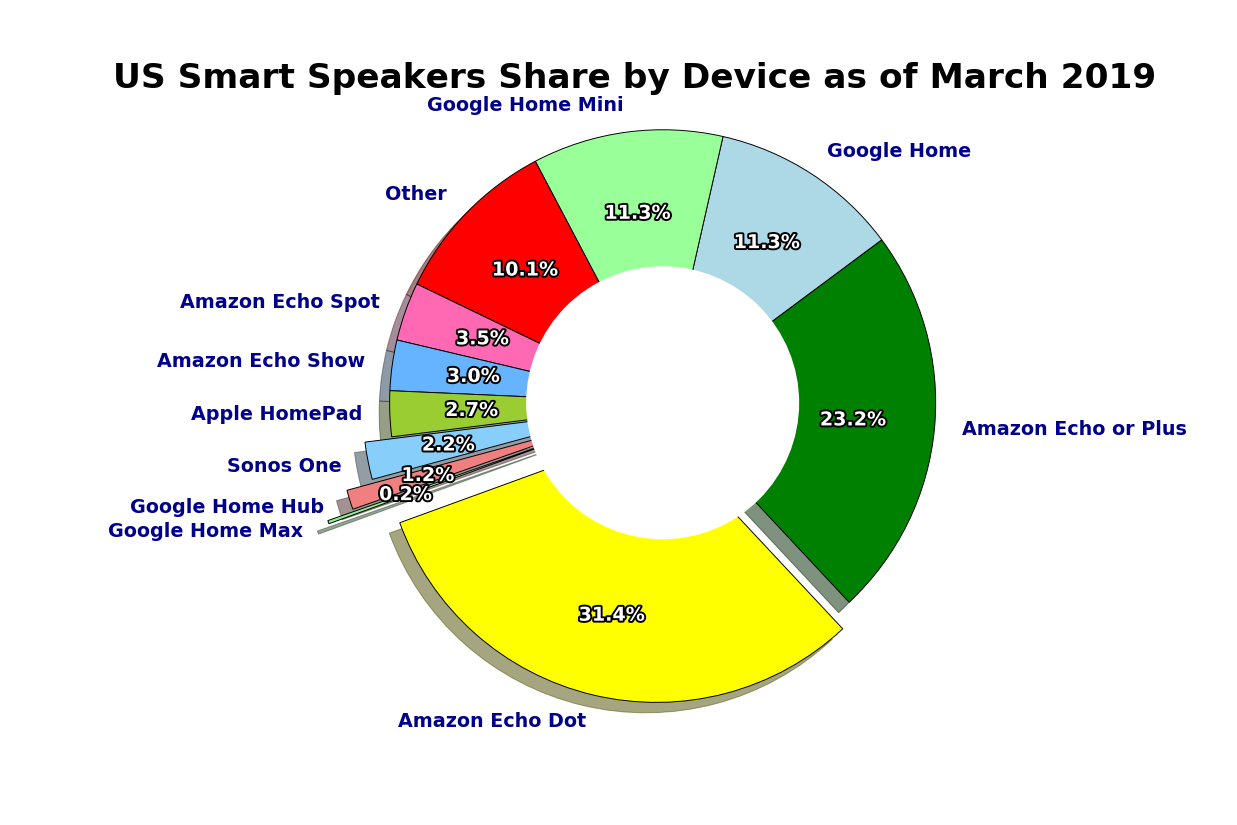

In [33]:
# Plot a pie chart

# Sort the values
pie_sort = final_devices_df.sort_values("Count", ascending = False)

# Define variables
pie_name = pie_sort["Devices"]
pie_count = pie_sort["Count"]
plt.figure(figsize = [9, 6])
explode = (0.1,0,0,0,0,0,0,0,0.1,0.2,0.3)
colors = ["yellow",
          "green",
          "lightblue",
          "#99ff99",
          "red",
          "hotpink",
          "#66b3ff",
          "yellowgreen",
          "lightskyblue",
          "lightcoral",
          "lightgreen"]

# Plot pie
plt.figure(1)
patches, texts, autotexts = plt.pie(pie_count,
                                    labels = pie_name,
                                    autopct = "%1.1f%%",
                                    colors = colors,
                                    explode = explode,
                                    shadow = True,
                                    pctdistance = 0.7,
                                    startangle = 200,
                                    wedgeprops = {"linewidth": 0.5,
                                                  "linestyle": "-",
                                                  "edgecolor":"0",
                                                  "antialiased": True})

# Change font color and bold Devices
for text in texts:
    text.set_color("darkblue")
    text.set_fontweight("bold")

# Change font color of Count values, bold, and add outline 
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")
    autotext.set_path_effects([path_effects.Stroke(linewidth = 2, foreground = "black"),
                               path_effects.Normal()])

# Set to equal
plt.axis("equal")

# Add a title
plt.title("US Smart Speakers Share by Device as of March 2019",
          fontsize = 18,
          fontweight = "bold")

# Plot a circle in the center
centre_circle = plt.Circle((0,0),0.5,fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display pie chart
plt.show()

In [11]:
# Save and export pie plot to png

plt.savefig("Output_Files/Device_market_shares.png")

### What do consumers buy using voice activated AI devices?

In [34]:
# Display Voice Shopping Consumer Report Dataframe
shop_df.head()

,shopping_method,own_smartphone,have_tried_a_voice_assistant,own_a_smart_speaker,own_feature_phone,no_mobile_device,shoppers_use_voice,online_apparel,online_everyday_household_items,online_entertainment_music_movies,...,voice_entertainment_music_movies,voice_consumer_electronics,voice_travel,voice_games,voice_groceries,voice_appliances,voice_furniture,voice_prepared_meal_or_drink,voice_none_of_the_above,voice_local_services
0,physical,no,no,no,no,no,no,yes,yes,no,...,no,yes,no,yes,no,no,no,no,no,no
1,physical,yes,no,no,no,no,yes,no,no,yes,...,no,yes,no,no,no,no,no,no,yes,no
2,physical,yes,yes,no,no,yes,no,yes,yes,no,...,no,no,no,no,no,no,no,no,no,no
3,website,yes,yes,no,no,no,no,yes,yes,no,...,yes,no,no,no,no,yes,no,no,no,no
4,physical,yes,yes,no,no,no,no,yes,yes,no,...,no,no,no,no,no,no,no,yes,no,no


In [35]:
# Create a dataframe with only the relevant columns from the dataset that surveyed consumer shopping habits
voice_df = pd.DataFrame({"Apparel": shop_df["voice_apparel"],
                        "Everyday Household Items": shop_df["voice_everyday_household_items"],
                        "Entertainment, Music, Movies": shop_df["voice_entertainment_music_movies"],
                        "Consumer Elctronics": shop_df["voice_consumer_electronics"],
                        "Travel": shop_df["voice_travel"],
                        "Games": shop_df["voice_games"],
                        "Groceries": shop_df["voice_groceries"],
                        "Appliances": shop_df["voice_appliances"],
                        "Furniture": shop_df["voice_furniture"],
                        "Prepared Meal or Drink": shop_df["voice_prepared_meal_or_drink"],
                        "None of the Above": shop_df["voice_none_of_the_above"],
                        "Local Services": shop_df["voice_local_services"]})

# Display new dataframe
voice_df.head()

,Apparel,Everyday Household Items,"Entertainment, Music, Movies",Consumer Elctronics,Travel,Games,Groceries,Appliances,Furniture,Prepared Meal or Drink,None of the Above,Local Services
0,no,no,no,yes,no,yes,no,no,no,no,no,no
1,no,no,no,yes,no,no,no,no,no,no,yes,no
2,no,no,no,no,no,no,no,no,no,no,no,no
3,yes,yes,yes,no,no,no,no,yes,no,no,no,no
4,no,no,no,no,no,no,no,no,no,yes,no,no


In [36]:
# Get total number of surveyed
consumer_surveyed_total = len(voice_df["Travel"])


print(f"There are a total of {consumer_surveyed_total} shopping consumers surveyed.")

There are a total of 1203 shopping consumers surveyed.


In [37]:
# Create new dataframe from column names
categories = list(voice_df.columns)
consumer_df = pd.DataFrame({"Categories": categories})
consumer_df

,Categories
0,Apparel
1,Everyday Household Items
2,"Entertainment, Music, Movies"
3,Consumer Elctronics
4,Travel
5,Games
6,Groceries
7,Appliances
8,Furniture
9,Prepared Meal or Drink


In [38]:
# Add empty columns for the count for those who use Voice for the category and for the percentage
consumer_df["Use Voice Count"] = ""
consumer_df["Use Voice %"] = ""

# Add the count per category and append to dataframe for Use Voice Count
for index, row in consumer_df.iterrows():
    
    # Pull in all rows with "yes" replies for the category and then count the yes responses
    response_yes = voice_df[voice_df[row["Categories"]] == "yes"]
    category_count = response_yes[row["Categories"]].count()
    
    # Add the count amount to the Use Voice Count column
    consumer_df.loc[index, "Use Voice Count"] = category_count
    
    # Add the percentage to the Use Voice % column
    consumer_df.loc[index, "Use Voice %"] = category_count/consumer_surveyed_total
    
# Display updated DataFrame with Use Voice % column updated with percentage formatting
consumer_df.style.format({"Use Voice %": "{:.2%}"})

,Categories,Use Voice Count,Use Voice %
0,Apparel,254,21.11%
1,Everyday Household Items,302,25.10%
2,"Entertainment, Music, Movies",254,21.11%
3,Consumer Elctronics,175,14.55%
4,Travel,143,11.89%
5,Games,228,18.95%
6,Groceries,143,11.89%
7,Appliances,101,8.40%
8,Furniture,111,9.23%
9,Prepared Meal or Drink,85,7.07%


<IPython.core.display.Javascript object>


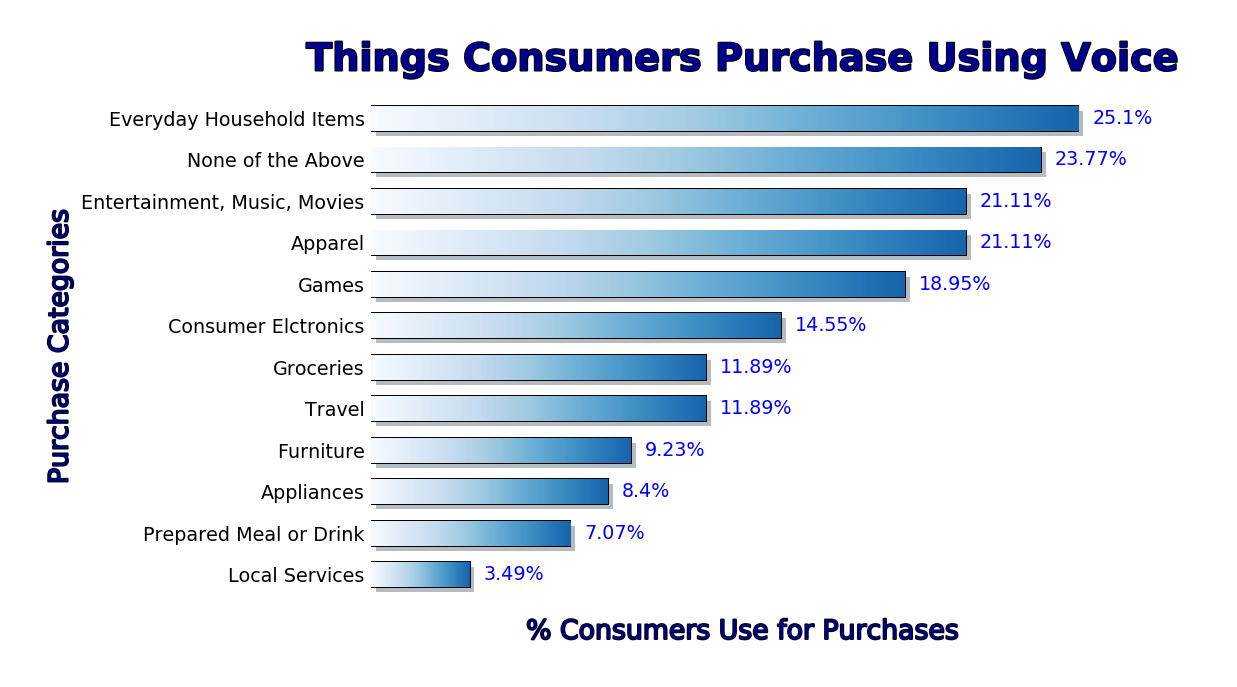

In [39]:
# Create horizontal bar plot

# Sort % Use Voice values
consumer_df.sort_values("Use Voice %", inplace = True)

# Define lists
x_axis = consumer_df["Use Voice %"]
y_axis = consumer_df["Categories"]

# Change figure size and add figure 2
plt.figure(figsize = [9, 5])
plt.figure(2)

# Plot horizontal bar graph with bordered bars, decrease bar size, and shadow effect
ax = plt.barh(y_axis,
              x_axis,
              height = 0.6,
              edgecolor = "black",
              align = "center",
              path_effects = [path_effects.SimplePatchShadow(offset = (2.5, -2.5),
                                                             shadow_rgbFace = None,
                                                             alpha = None,
                                                             rho = 0.3),
                              path_effects.Stroke(offset = (0, 0)),
                              path_effects.Normal()],)

# Create labels and special effects
plt.title("Things Consumers Purchase Using Voice",
          fontsize = 20,
          fontweight = "bold",
          color = "darkblue").set_path_effects([path_effects.Stroke(linewidth = 1, foreground = "black"),
                                                #path_effects.PathPatchEffect(offset = (1, -1), facecolor = "white"),
                                                path_effects.Normal()])

plt.ylabel("Purchase Categories",
           fontsize = 14,
           color = "darkblue").set_path_effects([path_effects.Stroke(linewidth = 1, foreground = "black"),
                                                 path_effects.Normal()])

plt.xlabel("% Consumers Use for Purchases",
           fontsize = 14,
           color = "darkblue").set_path_effects([path_effects.Stroke(linewidth = 1, foreground = "black"),
                                                 path_effects.Normal()])

# Adjust the bar graph to the right so that left hand labels will show up completely
plt.subplots_adjust(left = 0.3, bottom = None, right = None, top = None, wspace = None, hspace = None)

# Hide x axis ticks and value labels
plt.gca().axes.get_xaxis().set_ticks([])

# Hide y axis ticks only, but keep the tick labels
plt.tick_params(length = 0)

# Remove all borders from the diagram
sns.despine(left = True, top = True, right = True, bottom = True)

# Add value amounts next to each bar in percentages
for index, value in enumerate(x_axis):
    plt.text(value + 0.005,
             index,
             str(round((value) * 100, 2)) + '%',
             va = "center",
             color = "blue",
             fontweight = "medium")

# Create a color gradient for the bars
bar = ax
    
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0, 0.8, 256))
    ax = bars[0].axes
    lim = ax.get_xlim() + ax.get_ylim()
    for bar in bars:
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad,
                  extent = [x, x+w, y, y+h],
                  aspect = "auto",
                  zorder = 3,
                  norm = mpl.colors.NoNorm(vmin = 0, vmax = 1),
                  cmap = plt.get_cmap("Blues"))
    ax.axis(lim)

gradientbars(bar)    
    
# Show figure 2 plot
plt.show()

In [18]:
# Save and export pie plot to png

plt.savefig("Output_Files/Consumer_purchase_categories.png")